    Valor  Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
0       1                   36                0.072                    36
1       2                   24                0.048                    60
2       3                   36                0.072                    96
3       4                   25                0.050                   121
4       5                   29                0.058                   150
5       6                   14                0.028                   164
6       7                   29                0.058                   193
7       8                   25                0.050                   218
8       9                   23                0.046                   241
9      10                   19                0.038                   260
10     11                   17                0.034                   277
11     12                   31                0.062                   308
12     13                   20        

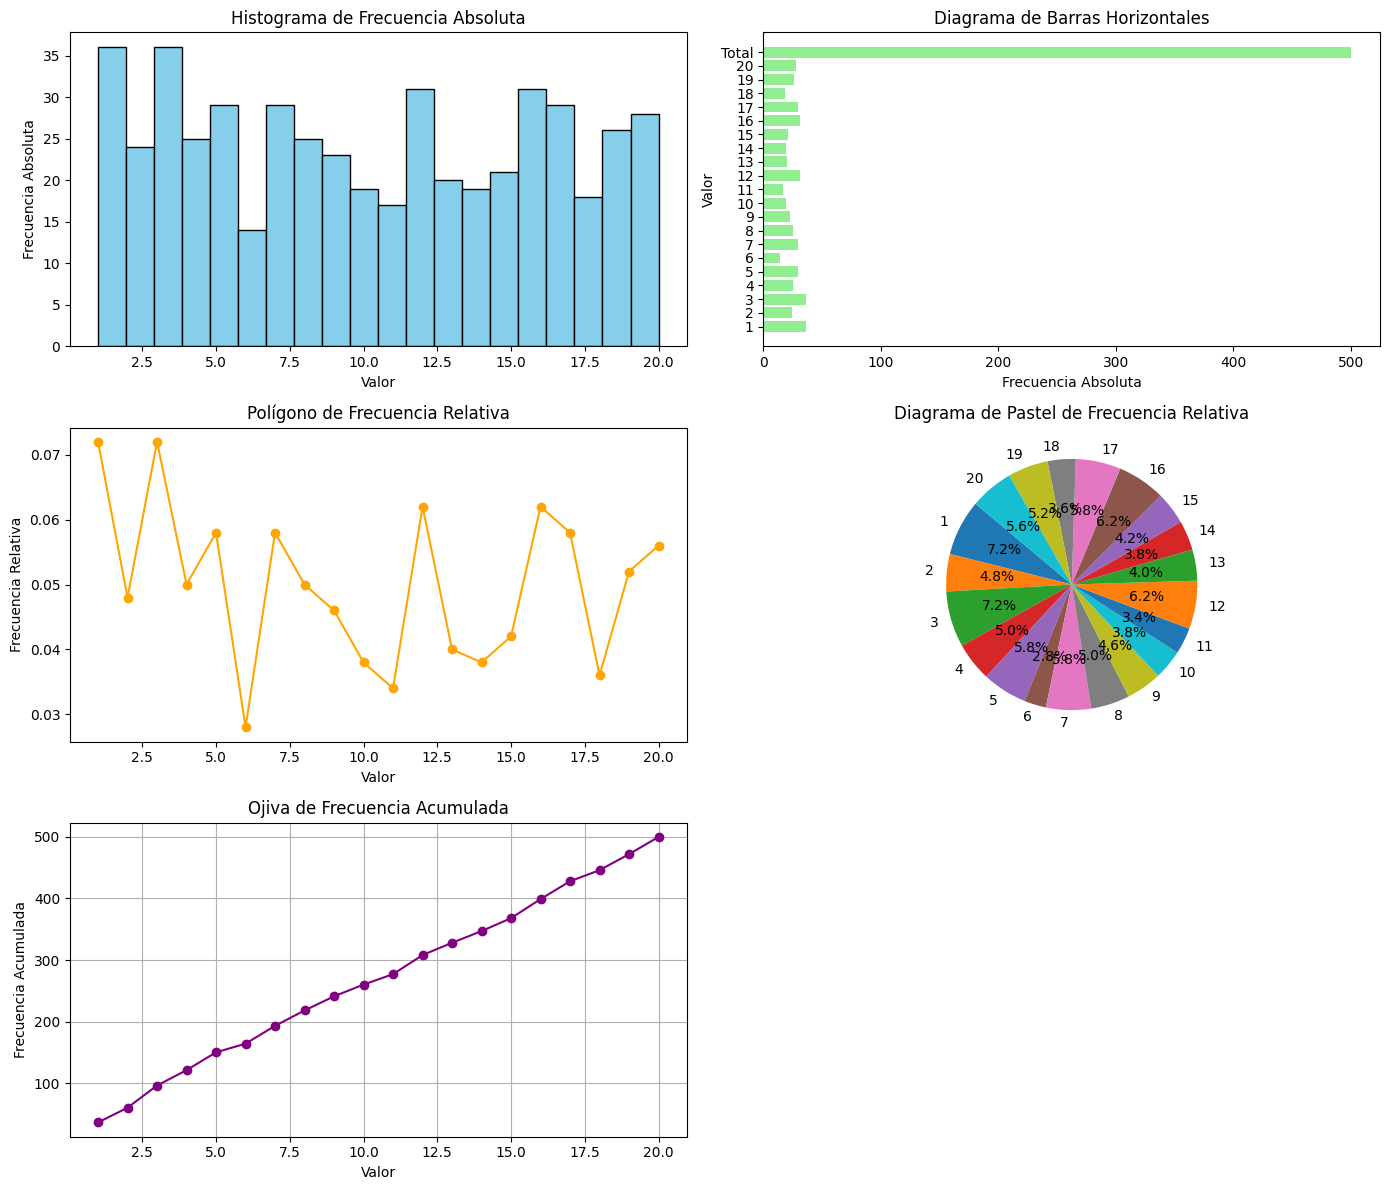

In [4]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generar datos aleatorios
np.random.seed(42)  # Para reproducibilidad
data = np.random.randint(1, 21, size=500)  # Datos de 1 a 20

# Crear tabla de frecuencia
frecuencia = pd.Series(data).value_counts().sort_index()
tabla_frecuencia = pd.DataFrame({
    'Valor': frecuencia.index,
    'Frecuencia Absoluta': frecuencia.values,
    'Frecuencia Relativa': frecuencia.values / len(data),
    'Frecuencia Acumulada': frecuencia.cumsum()
})

# Calcular totales
totales = {
    'Valor': 'Total',
    'Frecuencia Absoluta': tabla_frecuencia['Frecuencia Absoluta'].sum(),
    'Frecuencia Relativa': (tabla_frecuencia['Frecuencia Relativa'].sum() * 100),  # Convertir a porcentaje
    'Frecuencia Acumulada': tabla_frecuencia['Frecuencia Acumulada'].iloc[-1]
}

# Crear un DataFrame para los totales
totales_df = pd.DataFrame([totales])

# Concatenar la tabla de frecuencia con los totales
tabla_frecuencia = pd.concat([tabla_frecuencia, totales_df], ignore_index=True)

# Mostrar tabla de frecuencia con totales
print(tabla_frecuencia)

# Crear figura y ejes
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Graficar frecuencia absoluta usando un histograma
axs[0, 0].hist(data, bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histograma de Frecuencia Absoluta')
axs[0, 0].set_xlabel('Valor')
axs[0, 0].set_ylabel('Frecuencia Absoluta')

# Graficar frecuencia absoluta usando un diagrama de barras horizontales
axs[0, 1].barh(tabla_frecuencia['Valor'].astype(str), tabla_frecuencia['Frecuencia Absoluta'], color='lightgreen')
axs[0, 1].set_title('Diagrama de Barras Horizontales')
axs[0, 1].set_xlabel('Frecuencia Absoluta')
axs[0, 1].set_ylabel('Valor')

# Graficar frecuencia relativa usando un polígono de frecuencia
axs[1, 0].plot(tabla_frecuencia['Valor'][:-1], tabla_frecuencia['Frecuencia Relativa'][:-1], marker='o', color='orange')
axs[1, 0].set_title('Polígono de Frecuencia Relativa')
axs[1, 0].set_xlabel('Valor')
axs[1, 0].set_ylabel('Frecuencia Relativa')

# Graficar frecuencia relativa usando un diagrama de pastel
axs[1, 1].pie(tabla_frecuencia['Frecuencia Relativa'][:-1], labels=tabla_frecuencia['Valor'][:-1].astype(str), autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Diagrama de Pastel de Frecuencia Relativa')

# Graficar frecuencia acumulada usando la ojiva
axs[2, 0].plot(tabla_frecuencia['Valor'][:-1], tabla_frecuencia['Frecuencia Acumulada'][:-1], marker='o', color='purple')
axs[2, 0].set_title('Ojiva de Frecuencia Acumulada')
axs[2, 0].set_xlabel('Valor')
axs[2, 0].set_ylabel('Frecuencia Acumulada')
axs[2, 0].grid()

# Eliminar el último subplot vacío
fig.delaxes(axs[2, 1])

# Ajustar el layout
plt.tight_layout()
plt.show()